# Data Cleaning and Introduction

So to start off my project, what I want to do is that I want to import the necessary libraries and get to know my data and the type of problem that I need to solve. I'll start by importing the necessary libraries.

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Now I want to load my datasets into Python.

In [2]:
nyc_parties = pd.read_csv('party_in_nyc.csv')
bar_locations = pd.read_csv('bar_locations.csv')

Now that both of my datasets have been loaded into Python, I want to take a look at them to get a better idea on what I'm working with.

In [3]:
nyc_parties.head()

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


In [4]:
bar_locations.head()

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
0,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544096,-74.141155,40
1,Club/Bar/Restaurant,10012.0,NEW YORK,MANHATTAN,40.729793,-73.998842,18
2,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544209,-74.141040,21
3,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.866376,-73.928258,160
4,Club/Bar/Restaurant,11220.0,BROOKLYN,BROOKLYN,40.635207,-74.020285,17


So after examining both datasets, it appears that I have a lot of useful things to measure. I can examine things like the boroughs that are most affected by these noise complaints, the location type mostly affected by these noise complaints and the times of year that most parties take place. Before I do anything, I need to make sure to clean the data to avoid any inconsistencies in my analysis. The first thing to check for would be missing values.

In [5]:
np.sum(nyc_parties.isnull())

Created Date        0
Closed Date       795
Location Type       0
Incident Zip      990
City              990
Borough             0
Latitude         1468
Longitude        1468
dtype: int64

In [6]:
np.sum(bar_locations.isnull())

Location Type    0
Incident Zip     0
City             0
Borough          0
Latitude         0
Longitude        0
num_calls        0
dtype: int64

The good news is that `bar_locations` has no missing values, but the bad news is that there are plenty on `nyc_parties`. Now I'm curious to see how large the `nyc_parties` dataset is.

In [7]:
len(nyc_parties)

225414

So the dataset appears to be fairly large with the most missing values for a column being 1468. Before I do anything, I want to figure out which columns are most important for my analysis as that will be very helpful with the reduction of missing values from the dataset. I want to start off with the missing values from column `Closed Date`.

In [8]:
import datetime as dt
from datetime import datetime

nyc_parties['Created Date'] = pd.to_datetime(nyc_parties['Created Date'])
nyc_parties['Closed Date'] = pd.to_datetime(nyc_parties['Closed Date'])

date_diff = nyc_parties['Closed Date'] - nyc_parties['Created Date']
nyc_parties.insert(2, 'Party Duration', date_diff)

nyc_parties.head()

,Created Date,Closed Date,Party Duration,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,0 days 03:46:49,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,0 days 04:33:25,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,0 days 00:36:50,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,0 days 01:50:12,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,0 days 03:44:00,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


So I added a new column called `Party Duration` that takes the amount of time that each party lasted. I now want to work on dealing with those missing values.

In [9]:
np.sum(nyc_parties.isnull())

Created Date         0
Closed Date        795
Party Duration     795
Location Type        0
Incident Zip       990
City               990
Borough              0
Latitude          1468
Longitude         1468
dtype: int64

As it is shown above, both `Closed Date` and `Party Duration` both have the same amount of missing values. I want to try and see if imputing the mean into the missing values would work out well.

In [10]:
nyc_parties['Party Duration'].mean()

Timedelta('-1 days +15:23:18.896219821')

So it looks like on average, I have a negative amount of days. That can't be right. Time to do some investigation onto why I have a negative amount of days as my average.

In [11]:
nyc_parties.loc[nyc_parties['Party Duration'] < pd.Timedelta(0)]

,Created Date,Closed Date,Party Duration,Location Type,Incident Zip,City,Borough,Latitude,Longitude
28552,2016-03-12 18:29:57,1900-01-01,-42440 days +05:30:03,Street/Sidewalk,NaN,NaN,Unspecified,NaN,NaN
28852,2016-03-12 22:49:56,1900-01-01,-42440 days +01:10:04,Street/Sidewalk,NaN,NaN,Unspecified,NaN,NaN
28866,2016-03-12 22:56:09,1900-01-01,-42440 days +01:03:51,Residential Building/House,NaN,NaN,Unspecified,NaN,NaN


So with the table above I can see some `Closed Date` values that make absolutely no sense. Other than that, I don't see much going for these rows. It might be best to remove them, however they do have some interesting information like `Created Date` and `Location Type`. I'll just look more into these columns to see if I should completely remove them from the dataset.

In [12]:
nyc_parties['Location Type'].value_counts()

Residential Building/House    146040
Street/Sidewalk                42353
Store/Commercial               17617
Club/Bar/Restaurant            15766
Park/Playground                 3036
House of Worship                 602
Name: Location Type, dtype: int64

In [13]:
print(sum(nyc_parties['Created Date'].dt.date.value_counts()))

nyc_parties['Created Date'].dt.date.value_counts().mean()

225414


614.2070844686649

I mean after looking at it, it doesn't seem like I'll do much damage to the data if I remove those 3 rows from the dataset.

In [14]:
nyc_parties.drop(labels = [28552, 28852, 28866], inplace = True)

In [15]:
nyc_parties.loc[nyc_parties['Party Duration'] < pd.Timedelta(0)]

,Created Date,Closed Date,Party Duration,Location Type,Incident Zip,City,Borough,Latitude,Longitude


So now that those rows are gone, I'll take a look at the number of missing values in the dataset and the mean of `Party Duration`.

In [16]:
np.sum(nyc_parties.isnull())

Created Date         0
Closed Date        795
Party Duration     795
Location Type        0
Incident Zip       987
City               987
Borough              0
Latitude          1465
Longitude         1465
dtype: int64

In [17]:
nyc_parties['Party Duration'].mean()

Timedelta('0 days 04:59:32.821312818')

So a few missing values have disappeared from the dataset and now I have a mean for `Party Duration` that makes much more sense. Now I want to go back to dealing with the missing values from the dataset.

In [18]:
nyc_parties.head()

,Created Date,Closed Date,Party Duration,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,0 days 03:46:49,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,0 days 04:33:25,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,0 days 00:36:50,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,0 days 01:50:12,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,0 days 03:44:00,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


I want to first get an idea on how many rows are filled with missing values. To do that, I'll create a separate dataframe to examine them to see if they are still usable.

In [19]:
nyc_parties_missing = nyc_parties[nyc_parties.isnull().any(axis = 1)]
len(nyc_parties_missing)

1550

In [20]:
nyc_parties_missing.head(20)

,Created Date,Closed Date,Party Duration,Location Type,Incident Zip,City,Borough,Latitude,Longitude
38,2015-12-31 00:38:41,NaT,NaT,Residential Building/House,NaN,NaN,Unspecified,NaN,NaN
164,2015-12-31 09:58:06,NaT,NaT,Street/Sidewalk,NaN,NaN,Unspecified,NaN,NaN
498,2015-12-31 23:27:13,2016-01-01 12:17:26,0 days 12:50:13,Residential Building/House,NaN,NaN,Unspecified,NaN,NaN
550,2016-01-01 00:02:59,2016-01-01 23:35:50,0 days 23:32:51,Residential Building/House,NaN,NaN,Unspecified,NaN,NaN
579,2016-01-01 00:19:41,2016-01-01 08:58:56,0 days 08:39:15,Street/Sidewalk,NaN,NaN,Unspecified,NaN,NaN
741,2016-01-01 01:11:17,2016-01-01 23:36:54,0 days 22:25:37,Residential Building/House,NaN,NaN,Unspecified,NaN,NaN
1087,2016-01-01 03:14:51,2016-01-01 07:19:41,0 days 04:04:50,Residential Building/House,10009.0,NEW YORK,MANHATTAN,NaN,NaN
1794,2016-01-02 00:52:19,2016-01-03 01:29:08,1 days 00:36:49,Store/Commercial,NaN,NaN,Unspecified,NaN,NaN
1910,2016-01-02 04:36:45,2016-01-03 02:44:23,0 days 22:07:38,Residential Building/House,NaN,NaN,Unspecified,NaN,NaN
2307,2016-01-02 23:50:59,2016-01-03 04:18:41,0 days 04:27:42,Residential Building/House,NaN,NaN,Unspecified,NaN,NaN


In [21]:
nyc_parties_missing.tail(20)

,Created Date,Closed Date,Party Duration,Location Type,Incident Zip,City,Borough,Latitude,Longitude
220367,2016-12-22 17:17:51,NaT,NaT,Residential Building/House,NaN,NaN,Unspecified,NaN,NaN
220395,2016-12-22 20:24:27,NaT,NaT,Residential Building/House,NaN,NaN,Unspecified,NaN,NaN
220479,2016-12-22 22:58:57,NaT,NaT,Store/Commercial,NaN,NaN,Unspecified,NaN,NaN
221046,2016-12-24 00:50:12,NaT,NaT,Street/Sidewalk,NaN,NaN,Unspecified,NaN,NaN
221079,2016-12-24 01:26:18,NaT,NaT,Residential Building/House,NaN,NaN,Unspecified,NaN,NaN
221387,2016-12-24 20:10:09,NaT,NaT,Residential Building/House,NaN,NaN,Unspecified,NaN,NaN
221388,2016-12-24 20:13:07,2016-12-24 20:48:56,0 days 00:35:49,Residential Building/House,10019.0,NEW YORK,MANHATTAN,NaN,NaN
222109,2016-12-25 02:13:24,NaT,NaT,Residential Building/House,NaN,NaN,Unspecified,NaN,NaN
222445,2016-12-25 08:30:27,NaT,NaT,Residential Building/House,NaN,NaN,Unspecified,NaN,NaN
222958,2016-12-26 16:31:23,2016-12-26 17:20:39,0 days 00:49:16,Store/Commercial,10029.0,NEW YORK,MANHATTAN,NaN,NaN


In [22]:
nyc_parties_missing.isnull().sum()

Created Date         0
Closed Date        795
Party Duration     795
Location Type        0
Incident Zip       987
City               987
Borough              0
Latitude          1465
Longitude         1465
dtype: int64

In [23]:
nyc_parties_missing = nyc_parties_missing.dropna(subset = ['Party Duration', 'Incident Zip', 'City'])
len(nyc_parties_missing)

488

In [24]:
nyc_parties_missing.head(20)

,Created Date,Closed Date,Party Duration,Location Type,Incident Zip,City,Borough,Latitude,Longitude
1087,2016-01-01 03:14:51,2016-01-01 07:19:41,0 days 04:04:50,Residential Building/House,10009.0,NEW YORK,MANHATTAN,NaN,NaN
4182,2016-01-09 00:12:04,2016-01-09 07:15:55,0 days 07:03:51,Club/Bar/Restaurant,10471.0,BRONX,BRONX,NaN,NaN
5177,2016-01-10 02:45:17,2016-01-10 16:00:45,0 days 13:15:28,Residential Building/House,10456.0,BRONX,BRONX,NaN,NaN
6301,2016-01-15 08:28:41,2016-01-15 11:18:16,0 days 02:49:35,Residential Building/House,10024.0,NEW YORK,MANHATTAN,NaN,NaN
6584,2016-01-15 23:46:36,2016-01-15 23:53:02,0 days 00:06:26,Street/Sidewalk,10026.0,NEW YORK,MANHATTAN,NaN,NaN
11571,2016-01-30 15:20:32,2016-01-30 15:29:05,0 days 00:08:33,Street/Sidewalk,11236.0,BROOKLYN,BROOKLYN,NaN,NaN
11587,2016-01-30 15:55:17,2016-01-30 16:05:08,0 days 00:09:51,Street/Sidewalk,10027.0,NEW YORK,MANHATTAN,NaN,NaN
12669,2016-01-31 22:55:41,2016-02-01 00:29:11,0 days 01:33:30,Street/Sidewalk,10002.0,NEW YORK,MANHATTAN,NaN,NaN
14129,2016-02-06 00:56:33,2016-02-06 04:08:19,0 days 03:11:46,Residential Building/House,10027.0,NEW YORK,MANHATTAN,NaN,NaN
18624,2016-02-17 18:17:20,2016-02-17 21:55:18,0 days 03:37:58,Street/Sidewalk,11208.0,BROOKLYN,BROOKLYN,NaN,NaN


In [25]:
nyc_parties_missing.tail(20)

,Created Date,Closed Date,Party Duration,Location Type,Incident Zip,City,Borough,Latitude,Longitude
210048,2016-11-30 00:16:03,2016-11-30 01:38:21,0 days 01:22:18,Residential Building/House,10027.0,NEW YORK,MANHATTAN,NaN,NaN
210482,2016-12-01 23:19:42,2016-12-02 05:46:51,0 days 06:27:09,Store/Commercial,10036.0,NEW YORK,MANHATTAN,NaN,NaN
210769,2016-12-02 21:58:56,2016-12-03 04:21:47,0 days 06:22:51,Residential Building/House,10026.0,NEW YORK,MANHATTAN,NaN,NaN
210800,2016-12-02 22:22:47,2016-12-02 23:04:07,0 days 00:41:20,Residential Building/House,10039.0,NEW YORK,MANHATTAN,NaN,NaN
210956,2016-12-02 23:43:15,2016-12-03 01:00:37,0 days 01:17:22,Street/Sidewalk,10029.0,NEW YORK,MANHATTAN,NaN,NaN
211066,2016-12-03 00:33:40,2016-12-03 04:50:26,0 days 04:16:46,Residential Building/House,10023.0,NEW YORK,MANHATTAN,NaN,NaN
211101,2016-12-03 00:47:06,2016-12-03 01:14:02,0 days 00:26:56,Street/Sidewalk,10029.0,NEW YORK,MANHATTAN,NaN,NaN
211224,2016-12-03 02:26:59,2016-12-03 05:15:57,0 days 02:48:58,Residential Building/House,10024.0,NEW YORK,MANHATTAN,NaN,NaN
211959,2016-12-04 00:19:04,2016-12-04 03:34:14,0 days 03:15:10,Residential Building/House,10009.0,NEW YORK,MANHATTAN,NaN,NaN
212243,2016-12-04 02:14:13,2016-12-04 03:36:33,0 days 01:22:20,Residential Building/House,10031.0,NEW YORK,MANHATTAN,NaN,NaN


In [26]:
nyc_parties_missing.isnull().sum()

Created Date        0
Closed Date         0
Party Duration      0
Location Type       0
Incident Zip        0
City                0
Borough             0
Latitude          488
Longitude         488
dtype: int64

In [27]:
nyc_parties = nyc_parties.dropna(subset = ['Party Duration', 'Incident Zip', 'City'])
nyc_parties.head()

,Created Date,Closed Date,Party Duration,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,0 days 03:46:49,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,0 days 04:33:25,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,0 days 00:36:50,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,0 days 01:50:12,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,0 days 03:44:00,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


In [28]:
len(nyc_parties)

224349

After doing some digging around in the data I noticed a common trend with missing values. I found that most rows with missing values had almost all column values empty. I figured that my best option would be to drop all the troublesome rows. I still have a large amount of rows left over though. Now I'll check out the remaining missing values.

In [29]:
nyc_parties.isnull().sum()

Created Date        0
Closed Date         0
Party Duration      0
Location Type       0
Incident Zip        0
City                0
Borough             0
Latitude          488
Longitude         488
dtype: int64

So I cleared all missing values except from `Latitude` and `Longitude` as those columns have plenty of useful information that I can work with. Now I want to see if all the other columns make sense.

In [30]:
nyc_parties['City'].value_counts()

BROOKLYN               68884
NEW YORK               64087
BRONX                  47664
STATEN ISLAND           5407
JAMAICA                 4040
ASTORIA                 3453
CORONA                  2395
RIDGEWOOD               2226
SOUTH OZONE PARK        1852
SOUTH RICHMOND HILL     1764
FLUSHING                1760
FAR ROCKAWAY            1535
OZONE PARK              1494
WOODSIDE                1283
ELMHURST                1260
EAST ELMHURST           1257
JACKSON HEIGHTS         1229
WOODHAVEN               1115
RICHMOND HILL           1079
LONG ISLAND CITY        1072
QUEENS VILLAGE           953
SUNNYSIDE                691
HOLLIS                   670
FRESH MEADOWS            613
SAINT ALBANS             579
FOREST HILLS             532
COLLEGE POINT            529
ARVERNE                  510
SPRINGFIELD GARDENS      470
HOWARD BEACH             438
WHITESTONE               429
MASPETH                  409
ROCKAWAY PARK            378
ROSEDALE                 366
KEW GARDENS   

In [31]:
nyc_parties['Borough'].value_counts()

BROOKLYN         68880
MANHATTAN        64137
BRONX            47663
QUEENS           38262
STATEN ISLAND     5407
Name: Borough, dtype: int64

Now I want to go ahead an inspect the `bar_locations` dataframe to see if that data happens to be clean. As I saw earlier, there are no explicit missing values in the data, but since missing values can take on many forms, I want to investigate a bit.

In [32]:
bar_locations.head()

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
0,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544096,-74.141155,40
1,Club/Bar/Restaurant,10012.0,NEW YORK,MANHATTAN,40.729793,-73.998842,18
2,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544209,-74.141040,21
3,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.866376,-73.928258,160
4,Club/Bar/Restaurant,11220.0,BROOKLYN,BROOKLYN,40.635207,-74.020285,17


In [33]:
bar_locations['City'].value_counts()

NEW YORK               1078
BROOKLYN                737
ASTORIA                 141
BRONX                   141
STATEN ISLAND            64
RIDGEWOOD                31
JACKSON HEIGHTS          27
JAMAICA                  21
WOODSIDE                 21
LONG ISLAND CITY         20
SUNNYSIDE                14
RICHMOND HILL            12
OZONE PARK               12
FOREST HILLS             12
CORONA                   11
MASPETH                   8
FLUSHING                  8
SOUTH OZONE PARK          8
ELMHURST                  8
HOLLIS                    7
KEW GARDENS               7
SOUTH RICHMOND HILL       6
BAYSIDE                   6
ROCKAWAY PARK             5
EAST ELMHURST             5
WOODHAVEN                 4
FAR ROCKAWAY              4
COLLEGE POINT             3
GLEN OAKS                 3
LITTLE NECK               2
WHITESTONE                2
ROSEDALE                  2
HOWARD BEACH              2
CAMBRIA HEIGHTS           2
SAINT ALBANS              2
REGO PARK           

In [34]:
bar_locations['Borough'].value_counts()

MANHATTAN        1076
BROOKLYN          736
QUEENS            418
BRONX             141
STATEN ISLAND      64
Unspecified         5
Name: Borough, dtype: int64

So now, I can see that 5 are listed as Unspecified. I can filter out only those rows to see if it can be fixed.

In [35]:
bar_locations.loc[bar_locations['Borough'] == 'Unspecified']

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
2076,Club/Bar/Restaurant,11226.0,BROOKLYN,Unspecified,40.651398,-73.958960,12
2077,Club/Bar/Restaurant,10010.0,NEW YORK,Unspecified,40.741648,-73.991916,14
2078,Club/Bar/Restaurant,11385.0,RIDGEWOOD,Unspecified,40.712877,-73.905179,133
2079,Club/Bar/Restaurant,11411.0,CAMBRIA HEIGHTS,Unspecified,40.691883,-73.730533,17
2080,Club/Bar/Restaurant,10022.0,NEW YORK,Unspecified,40.759268,-73.971148,80


In [36]:
for i in range(2076, 2081):
    if bar_locations['City'].iloc[i] == 'BROOKLYN':
        bar_locations['Borough'].iloc[i] = 'BROOKLYN'
        
    elif bar_locations['City'].iloc[i] == 'NEW YORK':
        bar_locations['Borough'].iloc[i] = 'MANHATTAN'
        
    else:
        bar_locations['Borough'].iloc[i] = 'QUEENS'

C:\Users\PokeG\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [37]:
bar_locations.iloc[2076:2081]

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
2076,Club/Bar/Restaurant,11226.0,BROOKLYN,BROOKLYN,40.651398,-73.958960,12
2077,Club/Bar/Restaurant,10010.0,NEW YORK,MANHATTAN,40.741648,-73.991916,14
2078,Club/Bar/Restaurant,11385.0,RIDGEWOOD,QUEENS,40.712877,-73.905179,133
2079,Club/Bar/Restaurant,11411.0,CAMBRIA HEIGHTS,QUEENS,40.691883,-73.730533,17
2080,Club/Bar/Restaurant,10022.0,NEW YORK,MANHATTAN,40.759268,-73.971148,80


In [38]:
bar_locations['Borough'].value_counts()

MANHATTAN        1078
BROOKLYN          737
QUEENS            420
BRONX             141
STATEN ISLAND      64
Name: Borough, dtype: int64

So now the columns with value Unspecified have been filled with their appropriate boroughs. Before I do anything else, I want to make sure that each column has the appropriate data type.

In [39]:
nyc_parties.dtypes

Created Date       datetime64[ns]
Closed Date        datetime64[ns]
Party Duration    timedelta64[ns]
Location Type              object
Incident Zip              float64
City                       object
Borough                    object
Latitude                  float64
Longitude                 float64
dtype: object

In [40]:
bar_locations.dtypes

Location Type     object
Incident Zip     float64
City              object
Borough           object
Latitude         float64
Longitude        float64
num_calls          int64
dtype: object

# Statistical Analysis and Visualizations

To start off, I want to make sure that there are no outliers that could interfere with my findings for both datasets.

In [41]:
nyc_parties.head()

,Created Date,Closed Date,Party Duration,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,0 days 03:46:49,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,0 days 04:33:25,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,0 days 00:36:50,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,0 days 01:50:12,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,0 days 03:44:00,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


In [42]:
bar_locations.head()

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
0,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544096,-74.141155,40
1,Club/Bar/Restaurant,10012.0,NEW YORK,MANHATTAN,40.729793,-73.998842,18
2,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544209,-74.141040,21
3,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.866376,-73.928258,160
4,Club/Bar/Restaurant,11220.0,BROOKLYN,BROOKLYN,40.635207,-74.020285,17


Firstly, I want to inspect the `Party Duration` column on the `nyc_parties` dataframe using z_scores.

In [43]:
#nyc_parties[(np.abs(stats.zscore(nyc_parties['Party Duration'])) < 3)]

#nyc_parties['Party Duration'].dt.seconds.astype('int16') / 3600

p_dur_sec = nyc_parties['Party Duration'] / np.timedelta64(1, 's')
p_dur_sec

0         13609.0
1         16405.0
2          2210.0
3          6612.0
4         13440.0
           ...   
225409      464.0
225410     7805.0
225411    49060.0
225412    13951.0
225413     3660.0
Name: Party Duration, Length: 224349, dtype: float64

In [44]:
z_score = stats.zscore(p_dur_sec)
z_score

array([-0.10224096, -0.03622237, -0.37139185, ...,  0.73482092,
       -0.09416572, -0.33715474])

In [45]:
z_score[np.abs(z_score) < 3]

array([-0.10224096, -0.03622237, -0.37139185, ...,  0.73482092,
       -0.09416572, -0.33715474])

In [46]:
len(z_score)

224349

In [47]:
len(nyc_parties)

224349

In [48]:
type(z_score)

numpy.ndarray

So my plan now is to add my `z_score` values to my nyc_parties table as an extra column as I will be able to detect the outliers from there.

In [49]:
nyc_parties.head()

,Created Date,Closed Date,Party Duration,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,0 days 03:46:49,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,0 days 04:33:25,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,0 days 00:36:50,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,0 days 01:50:12,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,0 days 03:44:00,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


In [50]:
z_score = pd.Series(z_score)

nyc_parties.insert(3, 'Duration Z_Scores', z_score)

In [51]:
nyc_parties.head()

,Created Date,Closed Date,Party Duration,Duration Z_Scores,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,0 days 03:46:49,-0.102241,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,0 days 04:33:25,-0.036222,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,0 days 00:36:50,-0.371392,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,0 days 01:50:12,-0.267453,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,0 days 03:44:00,-0.106231,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


So now I've got my Z_scores available on my table so I should be able to easily detect the outliers now. But first, I need to make sure that my Z_Scores are correct.

In [52]:
nyc_zs_outliers = nyc_parties.loc[nyc_parties['Duration Z_Scores'] > 3]
nyc_zs_outliers['Party Duration'].mean()

Timedelta('0 days 06:39:00.976163873')

In [53]:
nyc_zs_accurate = nyc_parties.loc[nyc_parties['Duration Z_Scores'] < 3]
nyc_zs_accurate['Party Duration'].mean()

Timedelta('0 days 04:57:52.628522212')

In [54]:
nyc_parties['Party Duration'].mean()

Timedelta('0 days 04:58:59.079171291')

In [55]:
nyc_zs_outliers['Party Duration'].mean() - nyc_zs_accurate['Party Duration'].mean()

Timedelta('0 days 01:41:08.347641661')

So the averages for the larger Z_Scores (outliers) happen to have lasted for more time than those with a Z_Score smaller than 3 by a difference of a little over an hour and 40 minutes. Based on what happens when I do remove the larger Z_Scores from the `nyc_parties` dataframe, it's safe to say that it doesn't make much of a difference in the mean with the dataframe containing all values. Now I want to see when most parties took place during the year.

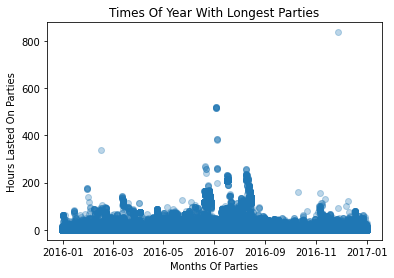

In [56]:
p_dur_hr = p_dur_sec / 3600

x = nyc_parties['Created Date']
y = p_dur_hr
plt.title('Times Of Year With Longest Parties')
plt.xlabel('Months Of Parties')
plt.ylabel('Hours Lasted On Parties')

plt.scatter(x, y, alpha = 0.3)
#plt.savefig('Python_Project_Visuals/longest_parties.png')

I noticed that there were some outliers that I discovered right in my data so I decided to remove the data that had parties longer than 200 hours. Now I'm going to fix the scatter plot so that I can get a better idea on the amount of parties happening during certain times of the year.

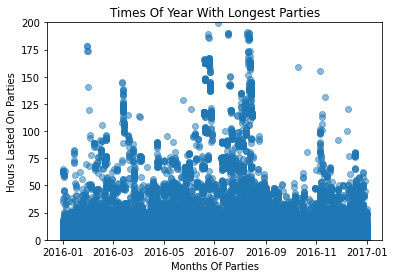

In [57]:
p_dur_sec = nyc_parties['Party Duration'] / np.timedelta64(1, 's')
p_dur_hr = p_dur_sec / 3600

x = nyc_parties['Created Date']
y = p_dur_hr
plt.title('Times Of Year With Longest Parties')
plt.xlabel('Months Of Parties')
plt.ylabel('Hours Lasted On Parties')
plt.ylim([0, 200])

plt.scatter(x, y, alpha = 0.5)
#plt.savefig('Python_Project_Visuals/longest_parties_2.png')

So now that I've zoomed in a bit more on my scatter plot, it looks like longer parties are mostly held around the summer time between June and September. March and April also look like they had plenty of long parties. Now I'm curious to see what type of location many of these parties took place in. To do that, my plan is to create a line graph with a legend of the average hours for each location type as the scatter plot has too many data points.

In [58]:
type(p_dur_hr)

pandas.core.series.Series

In [59]:
temp = pd.DataFrame({'Created Date': nyc_parties['Created Date'], 'Hour Duration': p_dur_hr,
                    'Location Type': nyc_parties['Location Type'], 'Borough': nyc_parties['Borough']})

temp['Month'] = temp['Created Date'].dt.strftime('%Y-%m')
temp.head()

,Created Date,Hour Duration,Location Type,Borough,Month
0,2015-12-31 00:01:15,3.780278,Store/Commercial,MANHATTAN,2015-12
1,2015-12-31 00:02:48,4.556944,Store/Commercial,MANHATTAN,2015-12
2,2015-12-31 00:03:25,0.613889,Residential Building/House,MANHATTAN,2015-12
3,2015-12-31 00:03:26,1.836667,Residential Building/House,BROOKLYN,2015-12
4,2015-12-31 00:05:10,3.733333,Residential Building/House,MANHATTAN,2015-12


In [60]:
avg_months = temp.groupby(['Month', 'Location Type']).mean()
avg_months.reset_index(inplace = True)

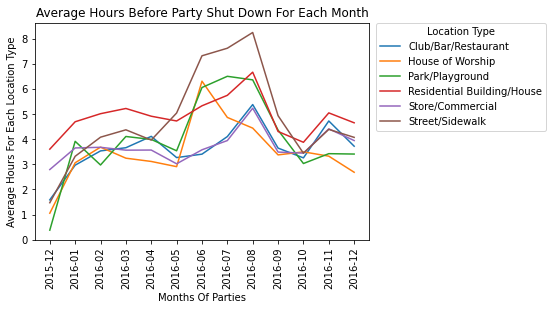

In [61]:
sns.lineplot(data = avg_months, x = 'Month', y = 'Hour Duration', hue = 'Location Type')
plt.title('Average Hours Before Party Shut Down For Each Month')
plt.xlabel('Months Of Parties')
plt.ylabel('Average Hours For Each Location Type')
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0, title = 'Location Type')
#plt.savefig('Python_Project_Visuals/avg_hours.png')

So now with my line graph, I can see that as the months go by, so do the average hours before a party gets shut down This is highest during the summer months as it is likely due to the nicer weather. This can explain the length of street/sidewalk parties being higher around this time while residential building/house parties go for a longer time during the cooler months. I believe that the reason for the average hours being higher during the warmer months could be because for pretty much every location types, that is where the peak is. What this is suggesting is that there may be more parties happening than there are enough cops that can shut down these parties. Noise complaints appear to be shut down fastest at a House of Worship. Now I want to get the same line graph, but I want to see this from the borough point of view.

In [62]:
avg_boroughs = temp.groupby(['Month', 'Borough']).mean()
avg_boroughs.reset_index(inplace = True)

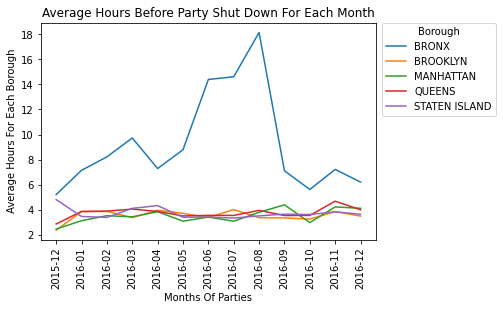

In [63]:
sns.lineplot(data = avg_boroughs, x = 'Month', y = 'Hour Duration', hue = 'Borough')
plt.title('Average Hours Before Party Shut Down For Each Month')
plt.xlabel('Months Of Parties')
plt.ylabel(' Average Hours For Each Borough')
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0, title = 'Borough')
#plt.savefig('Python_Project_Visuals/avg_hours_2.png')

So now, by looking at this, parties last longer in The Bronx before getting shut down and this appears to be the case for the entire year. With the other 4 boroughs though, they appear to get shut down much faster. Also in terms of the time of year, it seems like The Bronx is the borough where this gets mostly affected as the other boroughs go up and down throughout different months. Now I want to see the relationship between Location Type and Borough. This can be done with a stacked bar chart.

In [64]:
nyc_parties['Borough'].value_counts()

BROOKLYN         68880
MANHATTAN        64137
BRONX            47663
QUEENS           38262
STATEN ISLAND     5407
Name: Borough, dtype: int64

<ipython-input-65-0dbe301f0da1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_per_borough['Amount'] = 1


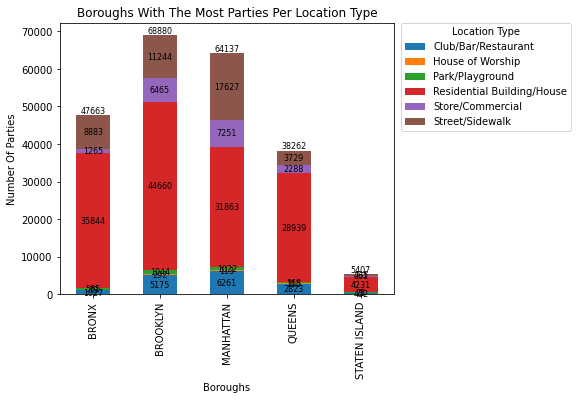

In [65]:
location_per_borough = nyc_parties[['Borough', 'Location Type']]
location_per_borough['Amount'] = 1
location_per_borough = location_per_borough.groupby(['Borough', 'Location Type']).sum()

ax = location_per_borough.unstack().plot(kind = 'bar', y = 'Amount', figsize = (6,5), stacked = True)
ax.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0, title = 'Location Type')
plt.title('Boroughs With The Most Parties Per Location Type')
plt.xlabel('Boroughs')
plt.ylabel('Number Of Parties')

for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], size = 8, label_type = 'center')
    
    if i == len(ax.containers) - 1:
        ax.bar_label(ax.containers[i], size = 8)
        
#plt.savefig('Python_Project_Visuals/borough_parties.png')

So throughout each borough, it looks like each borough has most parties in a residential building/house while in second place, parties are held in a street/sidewalk setting. The problem is that with the stacked bar chart that I have, it's harder to analyze smaller party location types. The best way that I can work around this is by zooming in a bit.

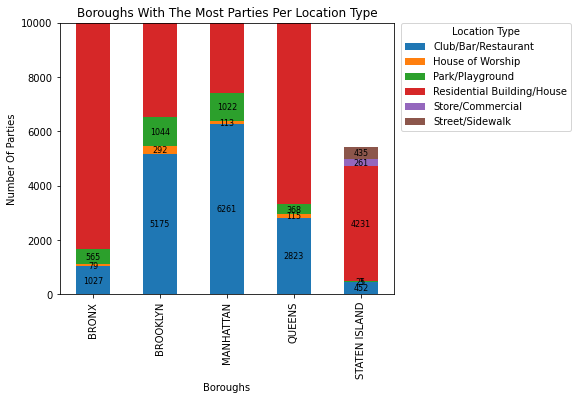

In [66]:
ax = location_per_borough.unstack().plot(kind = 'bar', y = 'Amount', figsize = (6,5), stacked = True)
ax.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0, title = 'Location Type')
plt.title('Boroughs With The Most Parties Per Location Type')
plt.xlabel('Boroughs')
plt.ylabel('Number Of Parties')
plt.ylim((0, 10000))

for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], size = 8, label_type = 'center')
    
#plt.savefig('Python_Project_Visuals/borough_parties_2.png')

So now with less of a mess over on the bottom, the numbers are much more clear. This gives more of an insight on how clubs/bars/restaurants also have plenty of parties held. The only issue now with this bar chart is that Staten Island still has a bit of a mess. Looks like I can fix this by zooming in even more.

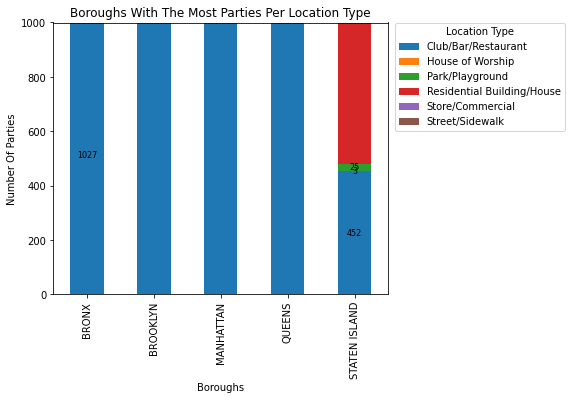

In [67]:
ax = location_per_borough.unstack().plot(kind = 'bar', y = 'Amount', figsize = (6,5), stacked = True)
ax.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0, title = 'Location Type')
plt.title('Boroughs With The Most Parties Per Location Type')
plt.xlabel('Boroughs')
plt.ylabel('Number Of Parties')
plt.ylim((0, 1000))

for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], size = 8, label_type = 'center')
    
#plt.savefig('Python_Project_Visuals/borough_parties_3.png')

So by looking even closer, I can see that Staten Island is the only borough where more parties are held in club/bar/restaurant locations than a street/sidewalk location. Now that I analyzed the party incidents for everything, I now want to get a bit more information on incidents for only the club/bar/incident location types. This information is on the `bar_locations` dataframe.

In [68]:
bar_locations.head()

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
0,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544096,-74.141155,40
1,Club/Bar/Restaurant,10012.0,NEW YORK,MANHATTAN,40.729793,-73.998842,18
2,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544209,-74.141040,21
3,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.866376,-73.928258,160
4,Club/Bar/Restaurant,11220.0,BROOKLYN,BROOKLYN,40.635207,-74.020285,17


Now I want to see if there are any outliers on the `num_calls` column. Firstly, I want to get the mean of the `num_calls` column.

In [69]:
bar_locations['num_calls'].mean()

37.02581967213115

So the mean is a little over 37. Now I want to verify for myself that there are no outliers by taking the Z_Score of the column.

In [70]:
zs = stats.zscore(bar_locations['num_calls'])
zs

array([ 0.04987753, -0.31906637, -0.26875584, ..., -0.33583655,
       -0.43645762, -0.43645762])

So now like before, I want to add those Z_Scores to the table.

In [71]:
zs = pd.Series(zs)
bar_locations['num_calls Z_Scores'] = zs
bar_locations.head()

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls,num_calls Z_Scores
0,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544096,-74.141155,40,0.049878
1,Club/Bar/Restaurant,10012.0,NEW YORK,MANHATTAN,40.729793,-73.998842,18,-0.319066
2,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544209,-74.141040,21,-0.268756
3,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.866376,-73.928258,160,2.062299
4,Club/Bar/Restaurant,11220.0,BROOKLYN,BROOKLYN,40.635207,-74.020285,17,-0.335837


So now with my Z_Scores on the table, it's time to check for outliers.

In [72]:
bar_locations.loc[bar_locations['num_calls Z_Scores'] > 3].head()

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls,num_calls Z_Scores
7,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.869549,-73.916348,271,3.923789
13,Club/Bar/Restaurant,10009.0,NEW YORK,MANHATTAN,40.723494,-73.988253,1175,19.084029
16,Club/Bar/Restaurant,10040.0,NEW YORK,MANHATTAN,40.864377,-73.926536,458,7.059812
43,Club/Bar/Restaurant,11238.0,BROOKLYN,BROOKLYN,40.682720,-73.963292,231,3.252981
54,Club/Bar/Restaurant,11238.0,BROOKLYN,BROOKLYN,40.681423,-73.957102,302,4.443664


In [73]:
len(bar_locations)

2440

In [74]:
len(bar_locations.loc[bar_locations['num_calls Z_Scores'] > 3])

29

So as far as the outliers go, there are almost 30 of them. I want to see if removing them would change the mean by a significant amount.

In [75]:
bar_locations['num_calls'].mean()

37.02581967213115

In [76]:
bar_locations_acc = bar_locations.loc[bar_locations['num_calls Z_Scores'] < 3]
bar_locations_acc['num_calls'].mean()

32.672335130651184

In [77]:
bar_locations['num_calls'].mean() - bar_locations_acc['num_calls'].mean()

4.353484541479965

So by removing the outliers, I would be changing the mean by around 4.35. I feel like I should keep the outliers as removing them can remove significant data. Now with this data, I feel like the best analysis that I can do is a heat map based on zip codes to show where the hot party spots are throughout the different boroughs. I can do this by using the Folium and Json libraries. 

In [78]:
import folium
import json
from folium import plugins
import branca.colormap as cm
from collections import defaultdict as dd
import webbrowser as wb

In [79]:
nyc_map = folium.Map(location = [40.9020, -73.9000], tiles = 'Stamen Toner', zoom_start = 9)

for i, r in bar_locations.iterrows():
    folium.CircleMarker((r.Latitude, r.Longitude),
                        radius = 3, weight = 2, color = 'red', fill_color = 'red',
                        fill_opacity = 0.5).add_to(nyc_map)

steps = 20
cm = cm.linear.YlOrRd_09.scale(0, 1).to_step(steps)
gm = dd(dict)

for i in range(steps):
    gm[1 / steps * i] = cm.rgb_hex_str(1 / steps * i)
    cm.add_to(nyc_map)

nyc_map.add_children(plugins.HeatMap(data = bar_locations[['Latitude', 'Longitude']].values,
                                    radius = 25, blur = 10))
#nyc_map.save('nyc_heatmap.html')
wb.open('nyc_heatmap.html')

<ipython-input-79-1c5e6bd38097>:16: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  nyc_map.add_children(plugins.HeatMap(data = bar_locations[['Latitude', 'Longitude']].values,


True

So as the heat map shows, there are different hot zones for bars based around location. It looks like Staten Island, East Queens and The Bronx aren't that much of a hot zone when it comes to bars. The bar scenes really start to pick up both in Manhattan and also in outer borough areas closer to Manhattan. This makes sense as Manhattan is what people think when they hear 'New York City'.

In terms of where I recommend to party, it really depends on the type of setting one is going for. If it's a bar, then definitely I would recommend Manhattan or anywhere in the outer boroughs close to Manhattan, but really it depends more on how far out someone is willing to go. For parties on houses and streets, The Bronx appears to go a long time with parties before getting shut down due to complaints though it's a bit more out of the way as it's closer to North Manhattan, but there still is quite the bar scene in the West Bronx and North Manhattan. Street/sidewalk parties work best when the weather is warmer. Really there are a lot of perspectives that one can take when choosing the type of location to party in and where in NYC to party in. Since Manhattan is a large borough, the best I can recomend around there is Downtown and Midtown as those are the main hot zones. However if someone wishes to go a bit higher, then the Upper East Side by 2nd Avenue works best. There's also a bit of a hot zone near the top of Manhattan by the George Washington Bridge.